# Biodiversity Project

For this project, we will interpret data from the National Parks Service about endangered species in different parks.

We will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, we will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

The questions we need to answer are :
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.



The datasets provided have the following columns of data:

species_info.csv:
* category - class of animal
* scientific_name - the scientific name of each species
* common_name - the common names of each species
* conservation_status - each species’ current conservation status

observations.csv:
* scientific_name - the scientific name of each species*
* park_name - Park where species were found
* observations - the number of times each species was observed at park

#### 1 - Importing the Data

We will start by importing the necessary libraries and putting the datasets into pandas dataframes

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

species = pd.read_csv('species_info.csv')
observation = pd.read_csv('observations.csv')

#### 2 - Preparing the Data for Analysis

Now we will get acquainted with the data, clean the data, and get it ready for deeper analysis

Let's start with the species dataframe

In [228]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [229]:
print(species.shape)

(5824, 4)


This dataset has 5824 rows and 4 columns

In [230]:
print(species.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


It appears that the column `conservation_status` has a lot of missing values

In [231]:
print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


It appears that the columns are in the right and logical datatypes

Now let's check the percentage of the missing values

In [232]:
percent_missing = species.isnull().sum() * 100 / len(species)
print(percent_missing)

category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64


the column `conservation_status` is missing nearly 97% of it's values in this dataset, but we can't drop it as it contains the most valuable information in this dataset

Let's fill the missing values with "No Intervention

In [233]:
species['conservation_status'] = species['conservation_status'].fillna('No Intervention')
print(species.conservation_status.value_counts())

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


Only 3% of the the column `conservation_status` is useful data about the endangered speceies, while 97% of it had no intervention

In [234]:
species_duplicates = species.duplicated()
print(species_duplicates.value_counts())

False    5824
dtype: int64


There are no duplicates in this dataset

Now let's do the same for the observation dataset

In [235]:
print(observation.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [236]:
print(observation.shape)

(23296, 3)


This dataset has 3 columns and 23296 rows, they might contain duplicates

In [237]:
print(observation.describe(include='all'))

         scientific_name                            park_name  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.890532
min                  NaN                                  NaN      9.000000
25%                  NaN                                  NaN     86.000000
50%                  NaN                                  NaN    124.000000
75%                  NaN                                  NaN    195.000000
max                  NaN                                  NaN    321.000000


In [238]:
print(observation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


It appears that there are no missing values, and that the values are in the right datatypes

In [239]:
observation_duplicates = observation.duplicated()
print(observation_duplicates.value_counts())

False    23281
True        15
dtype: int64


There are some duplicates, let's get rid of them

In [240]:
observation = observation.drop_duplicates()
observation_duplicates = observation.duplicated()
print(observation_duplicates.value_counts())

False    23281
dtype: int64


In [241]:
print(observation.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


We have 4 national parks

Now the both datasets are clean, and ready for analysis

#### 3 - Analysis of the Data

Starting with the species dataset, let's check the category of animals available in this dataset

In [242]:
print(species.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


We have 7 categories, let's check their counts and let's plot it

In [243]:
print(species.category.value_counts())

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


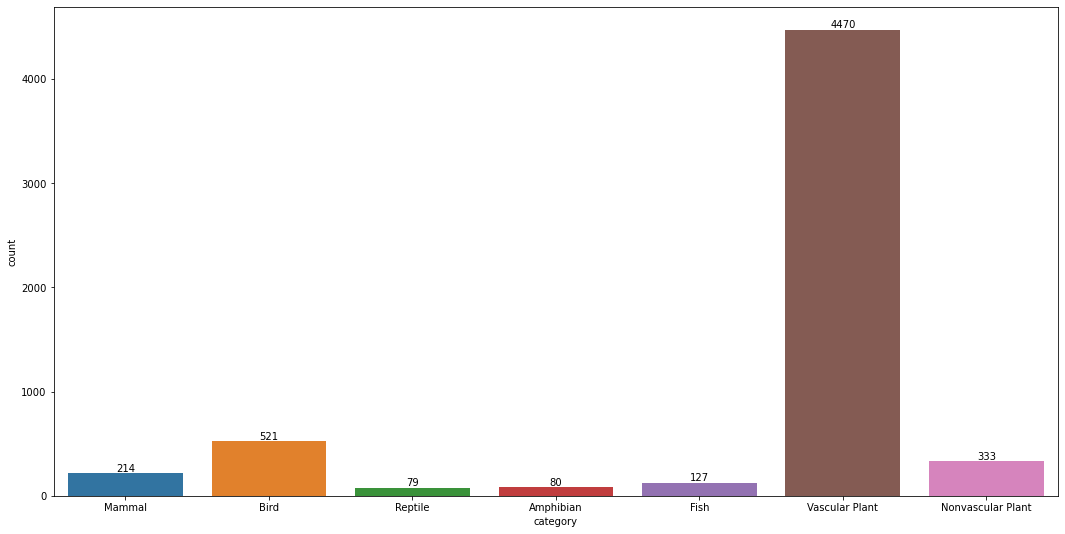

<function matplotlib.pyplot.clf()>

In [244]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='category', data=species)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf

The majority of animals available in this datset are Vascular Plants followed by Birds, with the least available are Amphibians and Reptiles

Now we will Answer the first question:
* What is the distribution of conservation status for species?

For that we need to check the column `conservation_status`

In [245]:
print(species.conservation_status.value_counts())

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


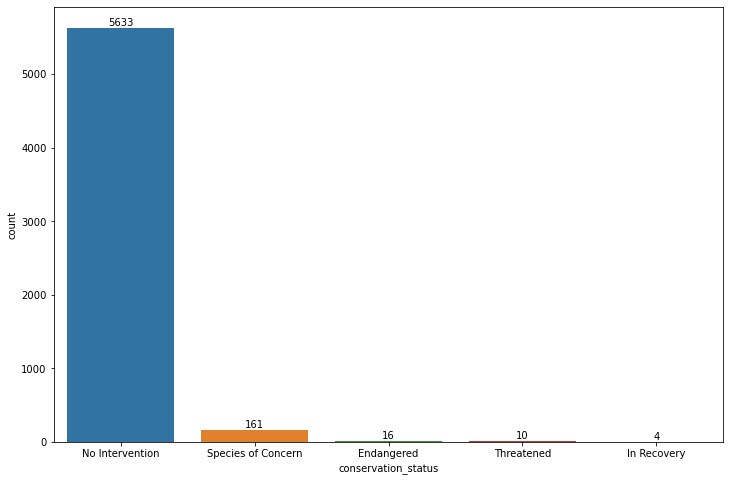

<function matplotlib.pyplot.clf()>

In [246]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='conservation_status', data=species)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf

There was no intervention for the majoriry of animal species

Now to have a better idea about the distribution of conservation status for species, let's drop the "No Intervention" values

In [247]:
species_endangered = species[species['conservation_status'] != 'No Intervention']
print(species_endangered.conservation_status.value_counts())

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


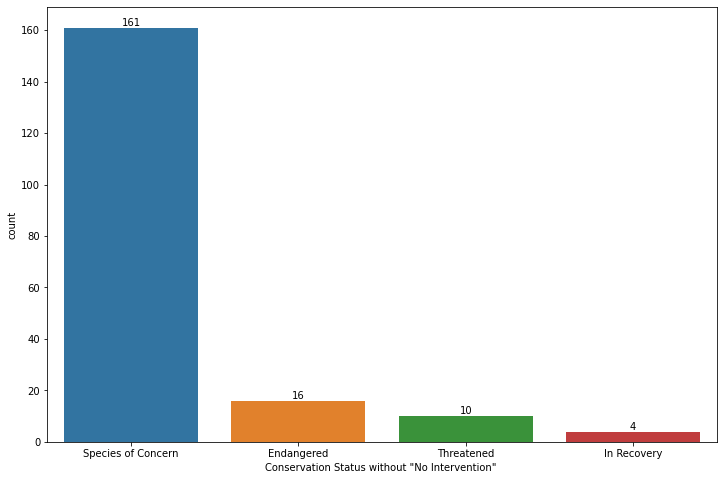

<function matplotlib.pyplot.clf()>

In [248]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='conservation_status', data=species_endangered)
ax.bar_label(ax.containers[0])
plt.xlabel("Conservation Status without \"No Intervention\" ")
plt.show()
plt.clf

We can see that we have much more Species of Concern than the rest, with only 4 category of animals In Recovery

Now let's answer this question:
* Are certain types of species more likely to be endangered?

Let's start by checking the entirety of the conseravtion status of species

In [249]:
print(pd.crosstab(species_endangered.category, species_endangered.conservation_status))

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                     1            0                   4           2
Bird                          4            3                  72           0
Fish                          3            0                   4           4
Mammal                        7            1                  28           2
Nonvascular Plant             0            0                   5           0
Reptile                       0            0                   5           0
Vascular Plant                1            0                  43           2


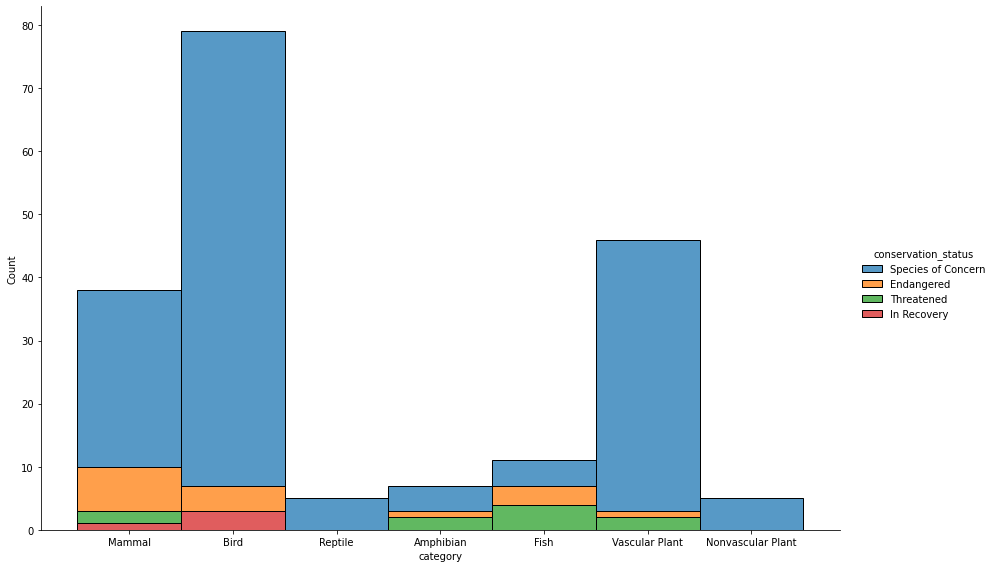

<function matplotlib.pyplot.clf()>

In [250]:
sns.displot(data=species_endangered, x="category", hue="conservation_status", multiple="stack", height=8, aspect=1.5)
plt.show()
plt.clf

Now we need to specify the endagered ones

In [251]:
endangered = species_endangered[species_endangered['conservation_status'] == 'Endangered']
print(pd.crosstab(endangered.category, endangered.conservation_status))

conservation_status  Endangered
category                       
Amphibian                     1
Bird                          4
Fish                          3
Mammal                        7
Vascular Plant                1


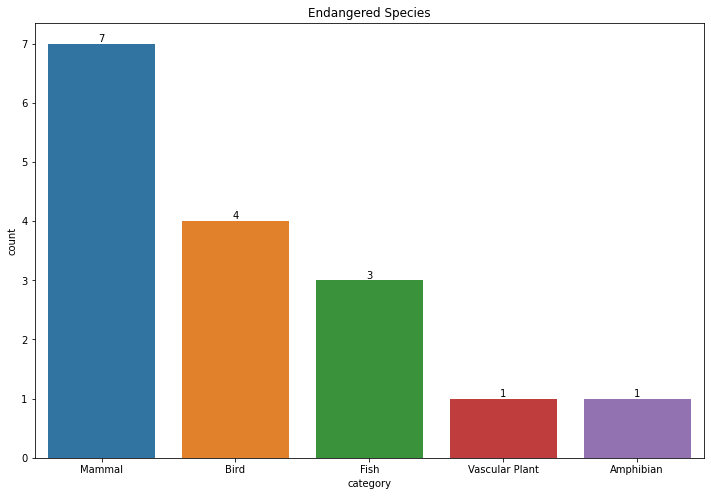

<function matplotlib.pyplot.clf()>

In [252]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='category', data=endangered)
ax.bar_label(ax.containers[0])
plt.title("Endangered Species")
plt.show()
plt.clf

The Mammals are more endangered followed by the birds, with the Vascular plants and Amphibians are the least endangered

Now onto the next question:
* Are the differences between species and their conservation status significant?

To answer this we need to go the what the category graph that we visualized earlier and compare it with the conservation status for species graph

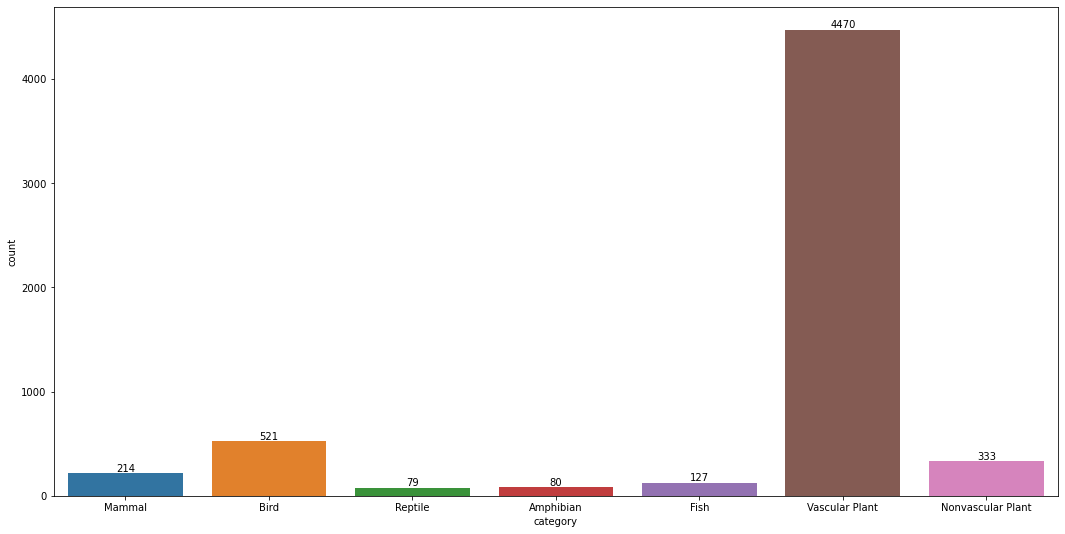

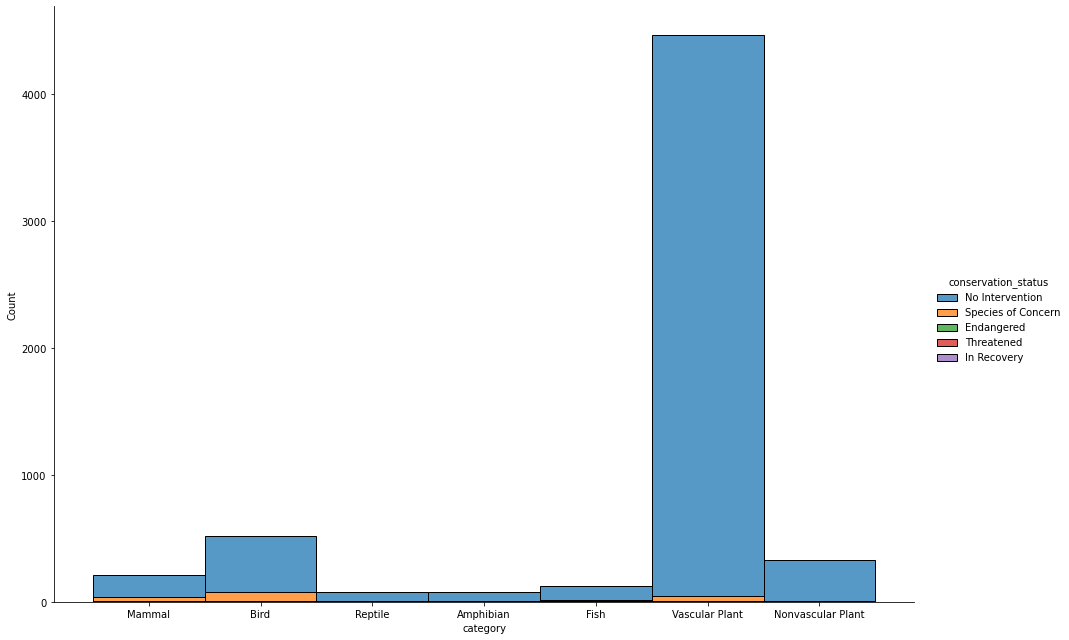

<function matplotlib.pyplot.clf()>

In [253]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='category', data=species)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf

sns.displot(data=species, x="category", hue="conservation_status", multiple="stack", height=9, aspect=1.45)
plt.show()
plt.clf


When looking at both plots like this it appears that there isn't any difference but this doesn't give us the full picture

Let's drop the "No Intervention" rows and let's try again

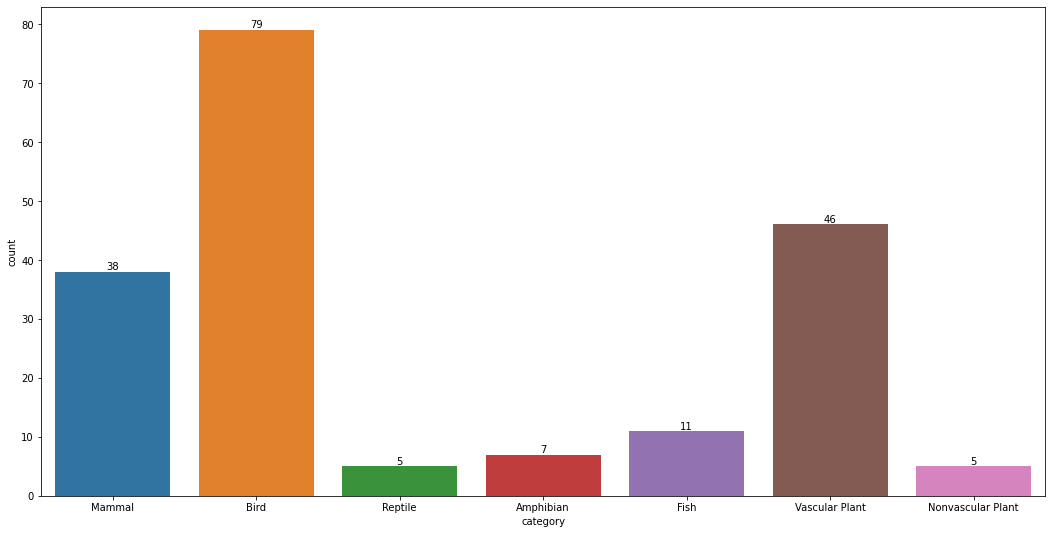

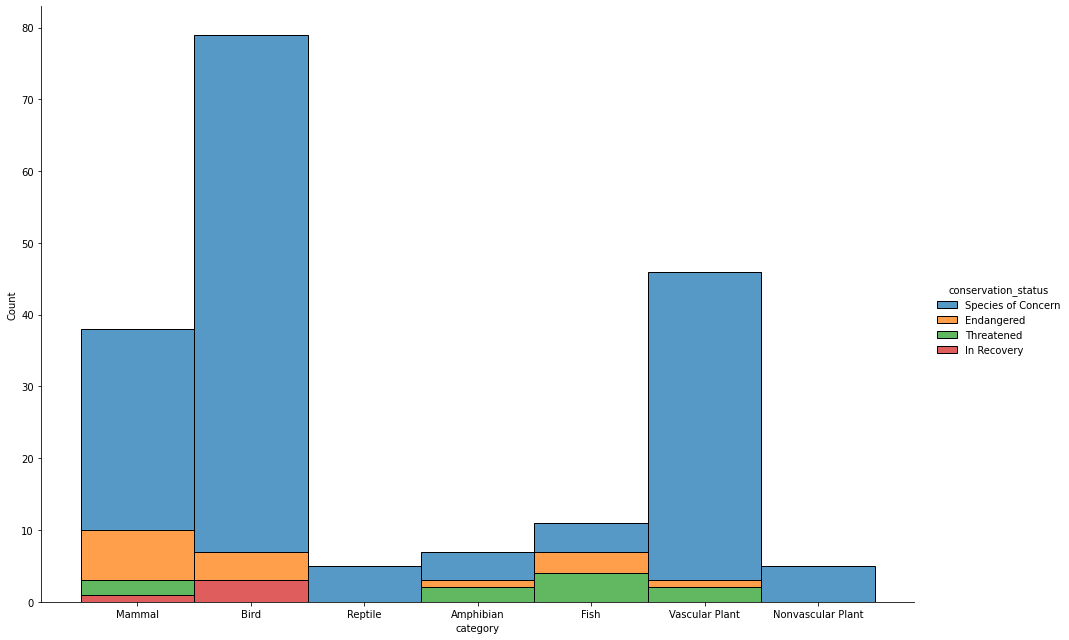

<function matplotlib.pyplot.clf()>

In [254]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='category', data=species_endangered)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf

sns.displot(data=species_endangered, x="category", hue="conservation_status", multiple="stack", height=9, aspect=1.45)
plt.show()
plt.clf

From the 2 graphs we can see that the Mammals are more endangered despite the Birds being the ones with most number of conservation status

Now let's check the observations dataset

In [255]:
print(observation.park_name.value_counts())

Bryce National Park                    5823
Yosemite National Park                 5821
Yellowstone National Park              5819
Great Smoky Mountains National Park    5818
Name: park_name, dtype: int64


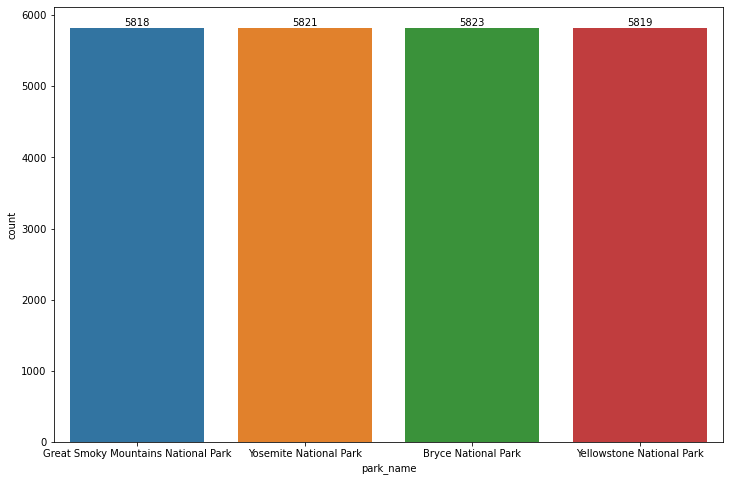

<function matplotlib.pyplot.clf()>

In [256]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='park_name', data=observation)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf

The national parks have pretty much the same number of animals, with more or less a few differences, probably due to the duplicates we dropped earlier

In [ ]:
print(observation.observations.sum())

We have a total of 3312429 observations throught all the parks

In [263]:
print(observation.groupby('park_name').observations.sum())

park_name
Bryce National Park                     575901
Great Smoky Mountains National Park     431378
Yellowstone National Park              1442314
Yosemite National Park                  862836
Name: observations, dtype: int64


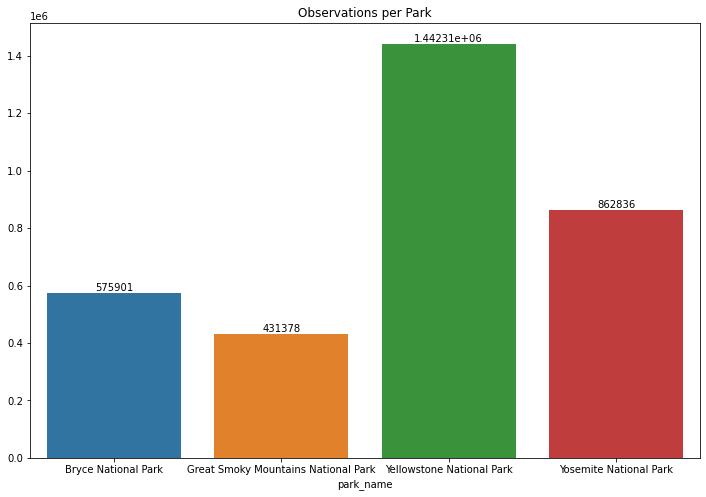

<Figure size 432x288 with 0 Axes>

In [270]:
park_number = observation.groupby('park_name').observations.sum()
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=park_number.index, y=park_number.values)
ax.bar_label(ax.containers[0])
plt.title('Observations per Park')
plt.show()
plt.clf()

Yellowstone National Park has the largest number of observations with 1442316 with Great Smokey Mountains National Park having the smallest amount with 431378

Now to answer the last question:
* Which animal is most prevalent and what is their distribution amongst parks?

For that, let's merge the two datasets together

In [273]:
species_observation = pd.merge(species, observation, on='scientific_name')
print(species_observation.head())


  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0     No Intervention                  Bryce National Park           130  
1     No Intervention            Yellowstone National Park           270  
2     No Intervention  Great Smoky Mountains National Park            98  
3     No Intervention               Yosemite National Park           117  
4     No Intervention               Yosemite National Park           128  


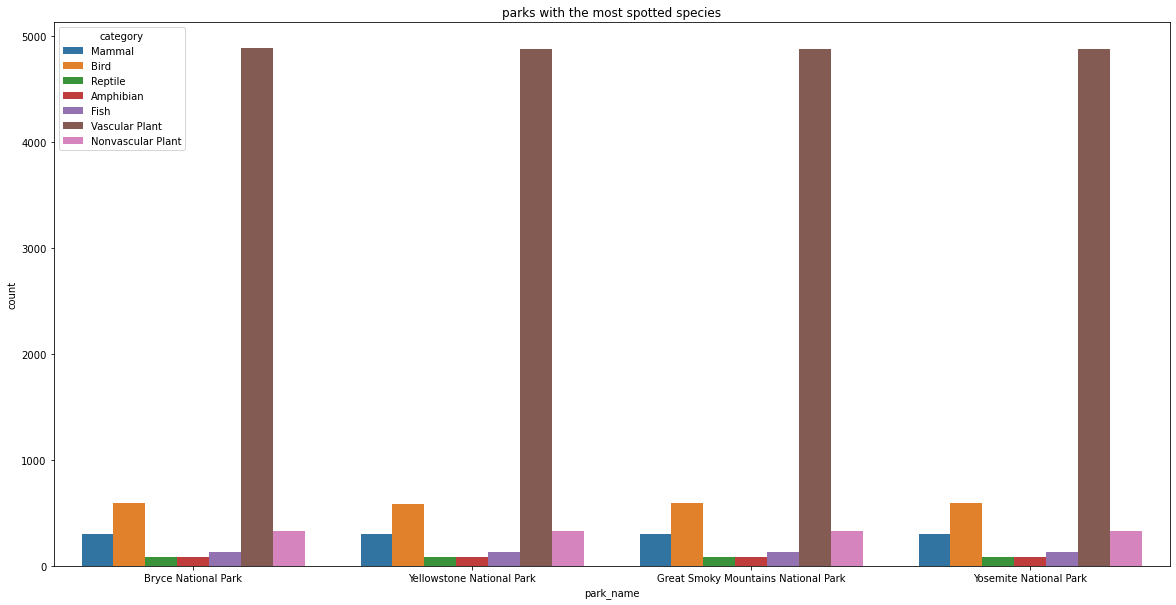

<Figure size 432x288 with 0 Axes>

In [279]:
plt.figure(figsize=(20, 10))
sns.countplot(x='park_name', hue=species_observation['category'], data=species_observation)
plt.title('parks with the most spotted species')
plt.show()
plt.clf()

In [281]:
print(pd.crosstab(species_observation.category, species_observation.park_name))

park_name          Bryce National Park  Great Smoky Mountains National Park  \
category                                                                      
Amphibian                           82                                   82   
Bird                               591                                  591   
Fish                               131                                  131   
Mammal                             300                                  300   
Nonvascular Plant                  333                                  333   
Reptile                             81                                   81   
Vascular Plant                    4888                                 4878   

park_name          Yellowstone National Park  Yosemite National Park  
category                                                              
Amphibian                                 82                      82  
Bird                                     588                     591  
Fish



The vascular plants were the species spotted the most in the 4 parks, with the reptiles and amphibians being the least spotted


Now let's check the same thing without the "No Intervention" rows

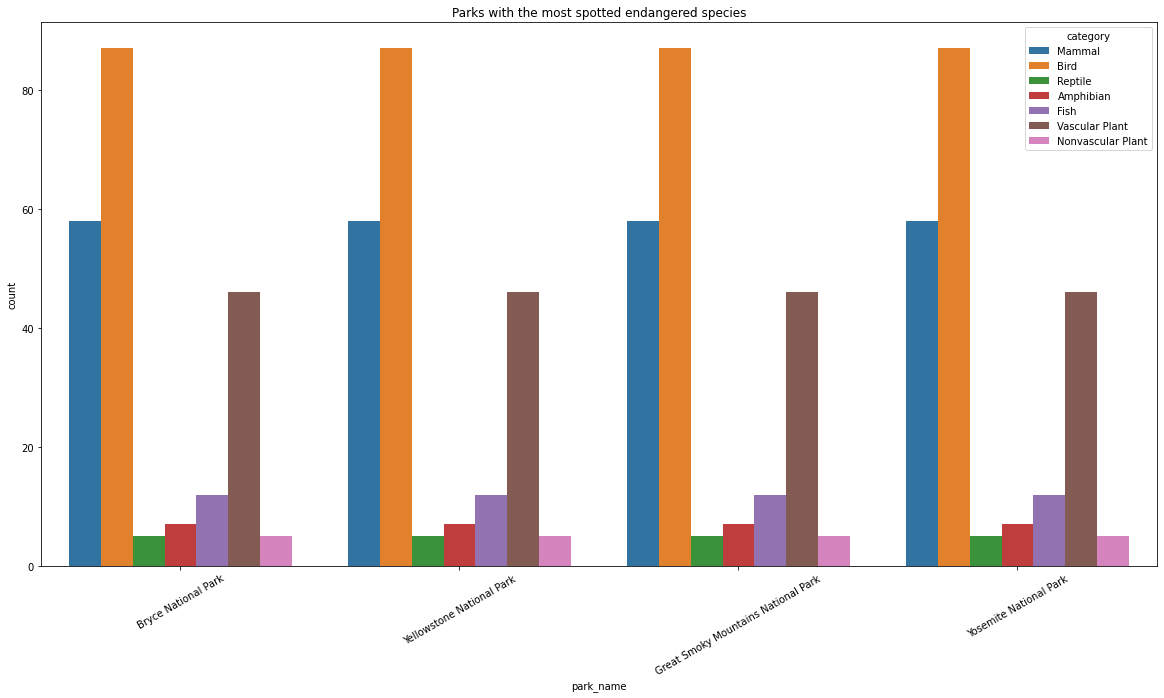

<Figure size 432x288 with 0 Axes>

In [285]:
endagered_species_observation = species_observation[species_observation['conservation_status'] != 'No Intervention']

plt.figure(figsize=(20, 10))
sns.countplot(x='park_name', hue=endagered_species_observation['category'], data=endagered_species_observation)
plt.xticks(rotation=30)
plt.title('Parks with the most spotted endangered species')
plt.show()
plt.clf()

In [286]:
print(pd.crosstab(endagered_species_observation.category, endagered_species_observation.park_name))

park_name          Bryce National Park  Great Smoky Mountains National Park  \
category                                                                      
Amphibian                            7                                    7   
Bird                                87                                   87   
Fish                                12                                   12   
Mammal                              58                                   58   
Nonvascular Plant                    5                                    5   
Reptile                              5                                    5   
Vascular Plant                      46                                   46   

park_name          Yellowstone National Park  Yosemite National Park  
category                                                              
Amphibian                                  7                       7  
Bird                                      87                      87  
Fish

The birds are the most spotted endangered species in the 4 parks, followed by the mammals and than the vascular plants, while reptiles, as before, as the least spotted

#### 3 - Analysis of the Data



After the analysis we learned that:
* The majority of the species in the 2 datasets are not endangered, only 3% are, but this is due to the missing data that we have, we are not sure why we are missing that data
* There isn't much difference between the species and their conservation status
* The birds are the species that are most endangered while the reptiles are the least endangered
* The species that are most spotted in the 4 national parks are the birds first and foremost



We learned quite a few things about these endangered species but the analysis is limited by the data available to us

The data had a lot of missing values, having that data would've helped us make a better stronger analysis, as we don't really know why we are missind the data, we don't know the methods that were used in capturing this data otherwise the conclusion could be quite different from what we found